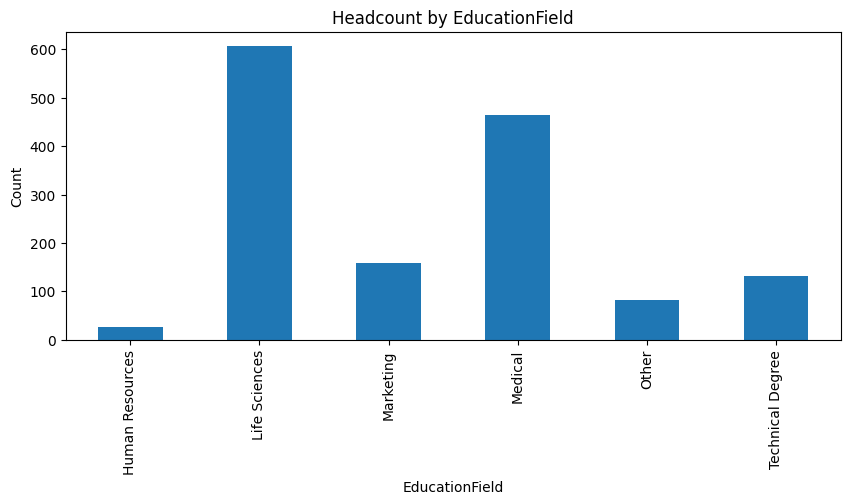

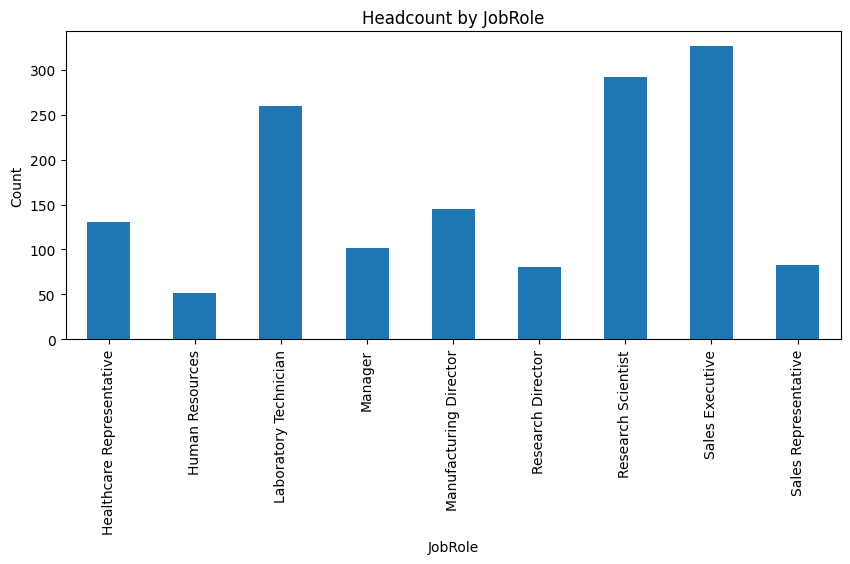

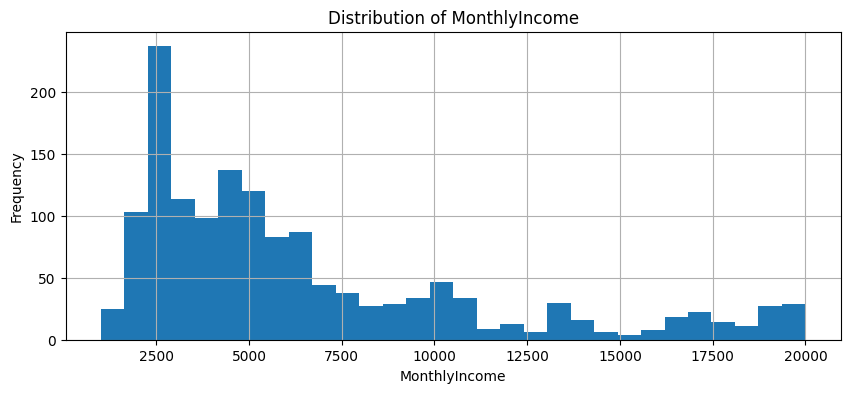

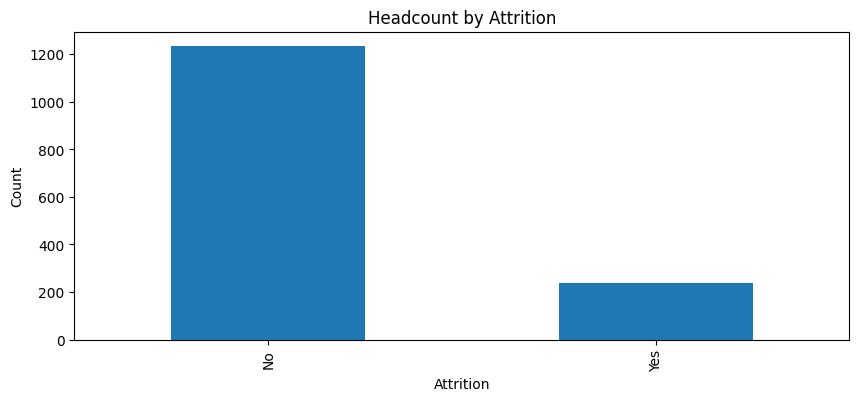

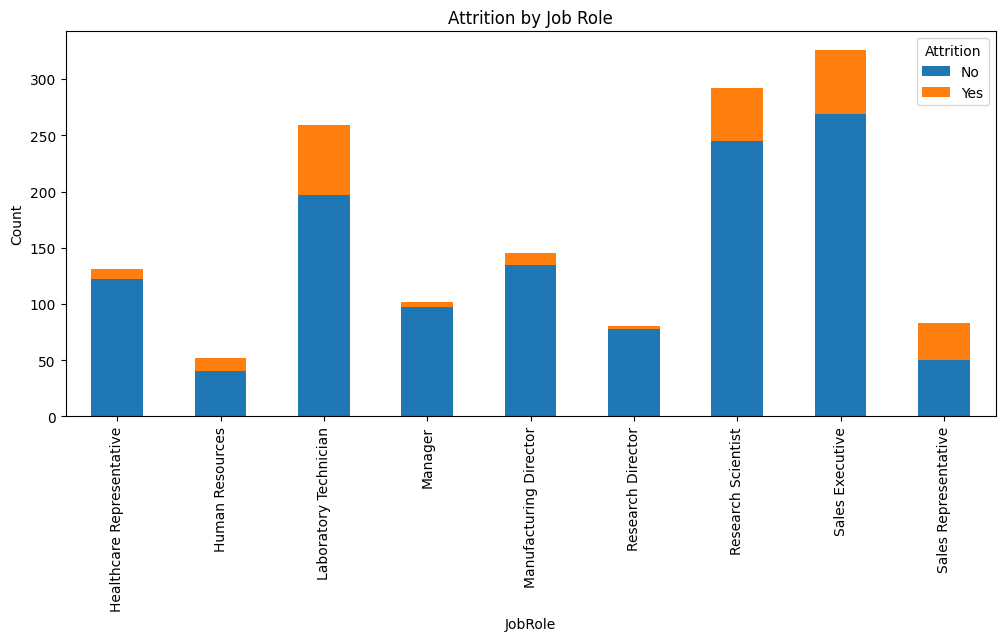

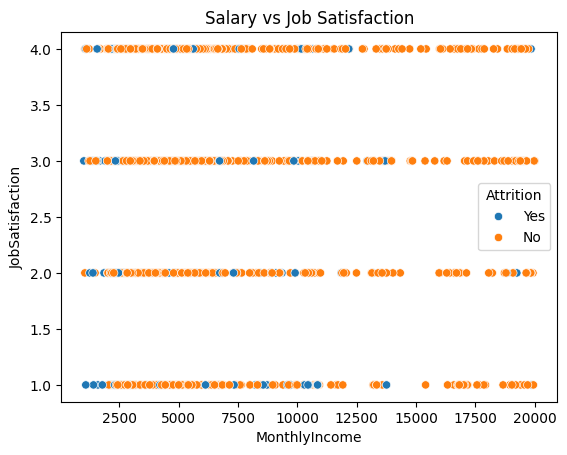

,Age,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,AttritionRate%
JobRole,,,,,
Sales Representative,30.0,2579.0,2.734940,2.734940,39.759036
Laboratory Technician,33.0,2886.0,2.691120,2.718147,23.938224
Human Resources,35.0,3093.0,2.557692,2.596154,23.076923
Sales Executive,35.0,6231.0,2.754601,2.671779,17.484663
Research Scientist,33.0,2887.5,2.773973,2.726027,16.095890
Manufacturing Director,37.0,6447.0,2.682759,2.917241,6.896552
Healthcare Representative,39.0,6811.0,2.786260,2.770992,6.870229
Manager,47.0,17454.5,2.705882,2.764706,4.901961
Research Director,44.5,16510.0,2.700000,2.500000,2.500000


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/data.csv")
# df.head()
# df.info()
# print(df.describe(include="all").T)

clean_df = df.copy()
# strip string whitespace
for col in clean_df.select_dtypes(include=["object"]).columns:
    clean_df[col] = clean_df[col].astype(str).str.strip()
clean_df.head()

plt.figure(figsize=(10,4))
clean_df["EducationField"].value_counts().sort_index().plot(kind="bar")
plt.title("Headcount by EducationField")
plt.xlabel("EducationField")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
clean_df["JobRole"].value_counts().sort_index().plot(kind="bar")
plt.title("Headcount by JobRole")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
clean_df["MonthlyIncome"].hist(bins=30)
plt.title("Distribution of MonthlyIncome")
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
clean_df["Attrition"].value_counts().sort_index().plot(kind="bar")
plt.title("Headcount by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

pd.crosstab(clean_df["JobRole"], clean_df["Attrition"]).plot(
    kind="bar",
    stacked=True,
    figsize=(12,5)
)
plt.title("Attrition by Job Role")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.show()


clean_df[["MonthlyIncome", "JobSatisfaction"]].corr()
sns.scatterplot(
    data=clean_df,
    x="MonthlyIncome",
    y="JobSatisfaction",
    hue="Attrition"
)
plt.title("Salary vs Job Satisfaction")
plt.show()

persona = clean_df.groupby("JobRole").agg({
    "Age": "median",
    "MonthlyIncome": "median",
    "JobSatisfaction": "mean",
    "EnvironmentSatisfaction": "mean",
    "Attrition": lambda x: (x=="Yes").mean() * 100
}).rename(columns={"Attrition": "AttritionRate%"})

persona.sort_values("AttritionRate%", ascending=False)

